In [1]:
import time
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng()

期望和方差不同的正态分布可以通过对服从标准正态分布的随机变量$\delta$做变换$\eta=\sigma\delta+\mu$得到，因此对正态分布进行抽样时只需得到标准正态分布即可  
标准正态分布的密度函数为  
$$f(x)=\frac{1}{\sqrt{2\pi}}\exp{\left(-\frac{x^2}{2}\right)}$$  
不能用函数解析积分求出分布函数$F(x)$，因而不能使用直接抽样法  
对这类函数积分时，一种常用的技巧是考虑二维的情形，考虑两个独立标准正态分布的联合分布  
$$f(x,y)=f(x)\cdot f(y)=\frac{1}{2\pi}\exp{\left(-\frac{x^2+y^2}{2}\right)}$$
变换为极坐标  
$$f(x,y)dxdy=f(r,\theta)rdrd\theta=\frac{1}{2\pi}r\exp{\left(-\frac{r^2}{2}\right)}drd\theta$$  
分开写成两部分  
$$f(r)=r\exp{\left(-\frac{r^2}{2}\right)}$$
$$f(\theta)=\frac{1}{2\pi}$$
通过反函数法可以得到r的分布，通过简单的变换可以得到$\theta$的分布  
$$r=\sqrt{-2\ln{u}}, \theta=2\pi v$$  
其中u和v是独立的[0,1]范围内均匀分布的随机变量  
变换回直角坐标
$$x=\sqrt{-2\ln{u}}\cos{2\pi v}$$  
$$y=\sqrt{-2\ln{u}}\sin{2\pi v}$$  
得到的(x,y)是服从二维标准正态分布的随机变量，由于x和y是相互独立的，x和y都服从标准正态分布  
根据上面的两个公式，我们可以用以下方法对标准正态分布进行抽样

In [2]:
def gauss_sample_1(mu, sigma):
    u, v = rng.uniform(0, 1, 2)
    return np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)*sigma + mu

In [3]:
#start = time.time()
X = [gauss_sample_1(2, 3) for _ in range(10000)]
#print(f"Time: {time.time() - start} s")

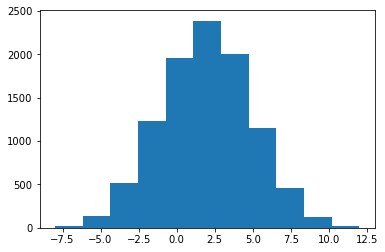

In [4]:
plt.hist(X, range=(-8,12), bins=11)
plt.show()

以上方法中需要进行正弦和余弦运算，这些运算是可以避免的  
产生[-1,1]范围内均匀分布的随机变量(a,b)，并去除单位圆外的部分，就得到了单位圆内均匀分布的随机变量  
余弦和正弦可以表示为  
$$\cos{\theta}=\frac{a}{\sqrt{a^2+b^2}}$$
$$\sin{\theta}=\frac{b}{\sqrt{a^2+b^2}}$$
可以验证这样产生的$\theta$是均匀分布的  
在公式中，除去正弦和余弦，还需要一个均匀分布的随机变量，即式中的u
$$x=\sqrt{-2\ln{u}}\cos{2\pi v}$$  
$$y=\sqrt{-2\ln{u}}\sin{2\pi v}$$  
$(a^2+b^2)$正好是[0,1]范围内均匀分布的随机变量，并且其与$\theta$是相互独立的，因此不必再另外产生一个随机数  
将(a,b)代入并整理，得到  
$$x=a\sqrt{-2\ln{(w)}/w}$$  
$$y=b\sqrt{-2\ln{(w)}/w}$$  
其中$w=a^2+b^2$

In [5]:
def gauss_sample_2(mu, sigma):
    u, v = rng.uniform(-1, 1, 2)
    while (w := u**2 + v**2) > 1:
        u, v = rng.uniform(-1, 1, 2)
    return u*np.sqrt(-2*np.log(w)/w)*sigma + mu

In [6]:
#start = time.time()
Y = [gauss_sample_2(2, 3) for _ in range(10000)]
#print(f"Time: {time.time() - start} s")

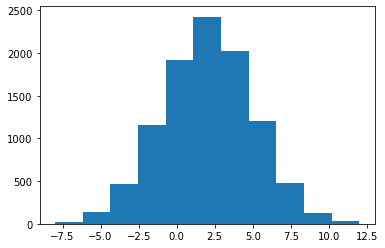

In [7]:
plt.hist(Y, range=(-8,12), bins=11)
plt.show()